#                   CSV FILE PREPROCESSING
                   

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


#### READ THE TRAIN AND TEST DATA 

In [7]:
# Read the data
data = pd.read_csv('D://PHD//train_factors-1573207730757.csv')   
c_test_data = pd.read_csv('D:\\PHD\\TestData\\test_factors.csv') 

In [8]:
# Sample data
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21-08-2018,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11-10-2018,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21-08-2018,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10-07-2018,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12-09-2018,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [9]:
c_test_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,21/07/18,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,05/10/18,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,01/10/18,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,24/10/18,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,27/07/18,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


#### CHECKING THE DIMENSIONS OF THE DATA

In [5]:
# Dimensions of data
data.shape

(27006, 11)

In [6]:
c_test_data.shape

(11575, 10)

#### COLUMNS PRESENT IN THE DATA 

In [10]:
# Column names of data
data.columns

Index(['Id', 'date', 'ticker', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7',
       'alpha'],
      dtype='object')

In [11]:
c_test_data.columns

Index(['Id', 'date', 'ticker', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6',
       'SF7'],
      dtype='object')

In [12]:
ID1 = c_test_data[['Id']]

In [13]:
ID1

,Id
0,270007
1,270008
2,270009
3,270010
4,270011
5,270012
6,270013
7,270014
8,270015
9,270016


#### DROPING THE COLUMNS 

In [14]:
# Droping id coloumn
cols_drop = ['Id']
data.drop(cols_drop,axis=1,inplace=True)

In [15]:
cols_drop = ['Id']
c_test_data.drop(cols_drop,axis=1,inplace=True)

#### SUMMARY OF THE DATA 

In [236]:
# Summary of data
data.describe()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
count,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000
mean,0.005429,-0.001005,-0.024421,-0.042420,0.041465,0.002597,0.036744,2.379582
std,0.941853,0.996130,0.539555,1.111309,0.976028,0.998839,1.204473,1.008681
min,-4.114670,-4.578587,-2.609150,-6.329798,-5.480268,-4.338751,-5.347869,1.000000
25%,-0.596792,-0.666310,-0.300187,-0.767247,-0.518641,-0.668027,-0.688198,2.000000
50%,0.012104,-0.013257,-0.040786,-0.058629,0.072127,0.007417,0.081374,2.000000
75%,0.611574,0.669094,0.241424,0.677433,0.616538,0.674592,0.807556,3.000000
max,4.415048,3.822270,3.452486,4.907407,4.779911,4.075428,5.182912,4.000000


In [237]:
c_test_data.describe()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7
count,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000
mean,0.001546,0.003995,-0.029754,-0.047606,0.053956,-0.000428,0.037914
std,0.924519,0.997903,0.537651,1.097842,0.965109,1.003503,1.192223
min,-4.130410,-4.034445,-4.259227,-4.704038,-4.545787,-4.317883,-5.031257
25%,-0.580470,-0.673206,-0.308838,-0.754051,-0.502280,-0.682896,-0.684029
50%,0.011865,-0.001464,-0.044590,-0.055108,0.084598,0.008303,0.081955
75%,0.600965,0.685805,0.228484,0.649046,0.620426,0.680800,0.807105
max,4.519223,4.108285,2.763214,4.794511,5.646556,3.900014,6.005315


#### CORELATION GRAPH FOR THE TRAIN DATA

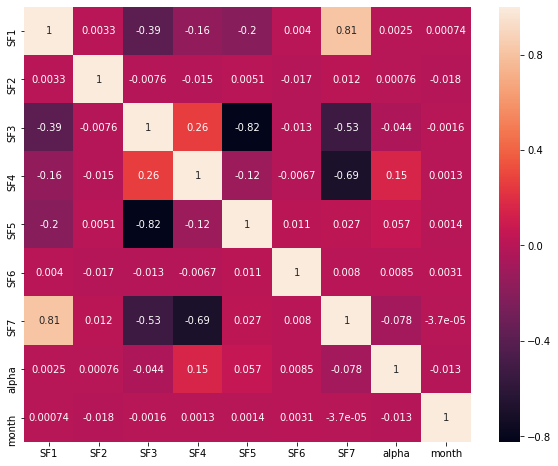

In [26]:
temp=data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True)

#### CORELATION GRAPH FOR TEST DATA 

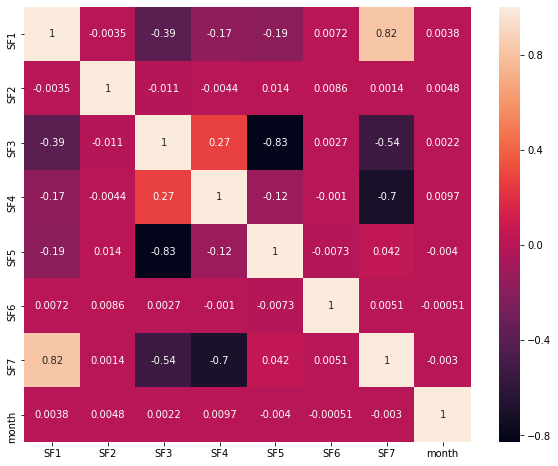

In [27]:
temp=c_test_data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True)

#### CHECKING FOR NULL VALUES

In [16]:
# checking for null values
data.isnull().sum()

date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
dtype: int64

In [17]:
c_test_data.isnull().sum()

date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
dtype: int64

#### CONVERTING THE DATATYPES

In [18]:
#converting date datatype to datetime
import datetime as datetime
data['date']=pd.to_datetime(data['date'])

In [19]:
#seperating month from date
data['month'] = data['date'].dt.month

In [20]:
data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,month
0,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,8
1,2018-11-10,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,11
2,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,8
3,2018-10-07,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,10
4,2018-12-09,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,12


In [21]:
import datetime as datetime
c_test_data['date']=pd.to_datetime(c_test_data['date'])

In [22]:
c_test_data['month'] = c_test_data['date'].dt.month

In [23]:
c_test_data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,month
0,2018-07-21,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,7
1,2018-05-10,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,5
2,2018-01-10,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,1
3,2018-10-24,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,10
4,2018-07-27,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,7


#### CHECKING FOR NO OF ALPHA'S 

In [24]:
#checking no of alphas
data["alpha"].value_counts()

2    10912
3     5536
1     5467
4     5091
Name: alpha, dtype: int64

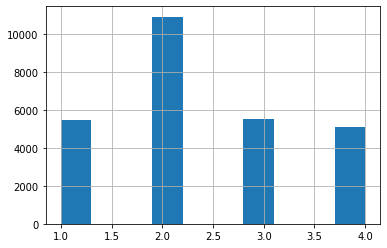

In [247]:
#graph for alpha count
data['alpha'].hist(bins=10) 

####  CHECKING FOR NO OF MONTHS

In [248]:
#checking value for month
data["month"].value_counts()

10    5160
7     5126
8     5113
9     4608
2      922
3      919
11     915
6      898
12     880
5      841
4      814
1      810
Name: month, dtype: int64

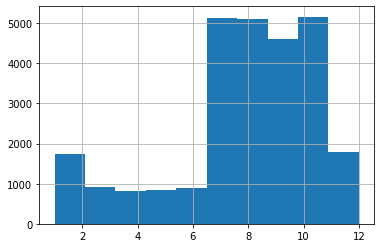

In [249]:
#graph for month valuecounts
data['month'].hist(bins=10)

In [250]:
c_test_data["month"].value_counts()

10    2252
7     2138
8     2131
9     1986
3      425
12     390
2      390
6      388
5      388
11     376
1      367
4      344
Name: month, dtype: int64

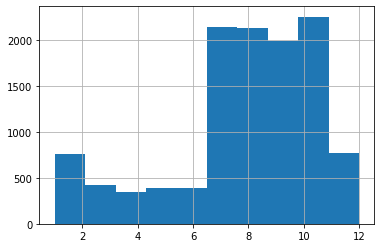

In [251]:
c_test_data['month'].hist(bins=10)

#### GRAPHS FOR ALL STOCK FACTORS   

Text(0.5, 1.0, 'Distribution of SF1')

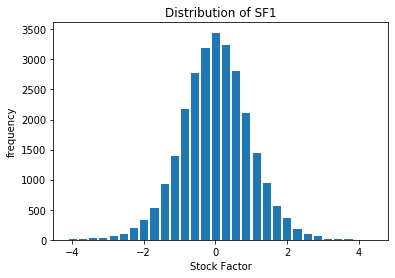

In [252]:
# graph for distribution of stock factor 1 
hist(data.SF1, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF1')

Text(0.5, 1.0, 'Distribution of SF2')

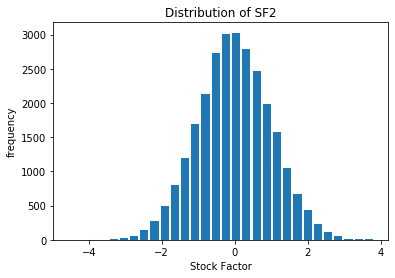

In [253]:
# graph for distribution of stock factor 2
hist(data.SF2, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF2')

Text(0.5, 1.0, 'Distribution of SF3')

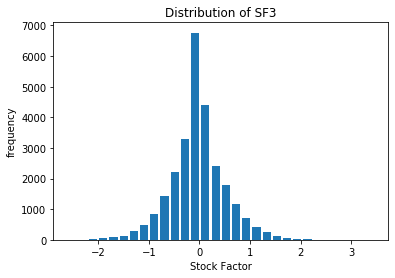

In [254]:
#graph for distribution of stock factor 3
hist(data.SF3, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF3')

Text(0.5, 1.0, 'Distribution of SF4')

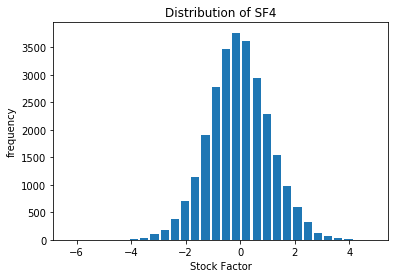

In [255]:
#graph for distribution of stock factor 4
hist(data.SF4, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF4')

Text(0.5, 1.0, 'Distribution of SF5')

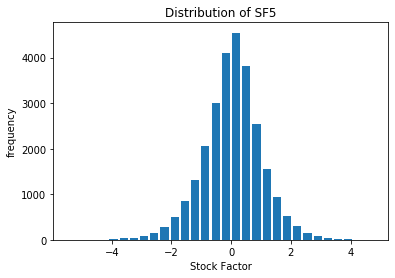

In [256]:
# graph for distribution of stock factor 5
hist(data.SF5, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF5')

Text(0.5, 1.0, 'Distribution of SF6')

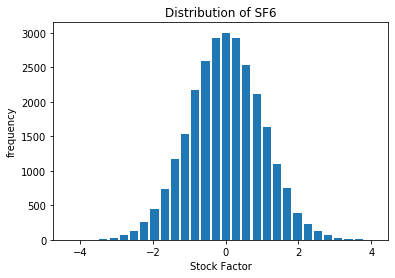

In [257]:
# graph for distribution of stock factor 6
hist(data.SF6, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF6')

Text(0.5, 1.0, 'Distribution of SF7')

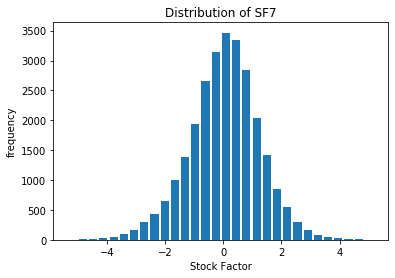

In [258]:
# graph for distribution of stock factor 7
hist(data.SF7, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF7')

#### CHECKING VALUE COUNTS FOR TICKER AND UNIQUE TICKERS

In [28]:
data["ticker"].value_counts()

$BAC      90
$NVDA     89
$GOOGL    88
$NFLX     88
$SHLD     88
$F        88
$AMD      87
$FB       87
$ATVI     86
$CHK      86
$DIS      85
$MU       85
$MSFT     85
$AAPL     84
$IBM      83
$BA       83
$CELG     83
$COST     82
$LMT      82
$JPM      82
$GOOG     82
$AAL      82
$INTC     81
$CLF      81
$T        80
$GE       80
$CAT      80
$GME      79
$PYPL     79
$X        79
          ..
$unfi      1
$fis       1
$XLF       1
$cah       1
$TECK      1
$PFGC      1
$SESN      1
$chtr      1
$SEND      1
$ENPH      1
$vrsn      1
$ben       1
$xec       1
$mtd       1
$LNG       1
$VST       1
$WDAY      1
$LVS       1
$OLLI      1
$DOMO      1
$WETF      1
$Crm       1
$ERJ       1
$r         1
$CANG      1
$FOE       1
$SQQQ      1
$SEAS      1
$anss      1
$NIO       1
Name: ticker, Length: 1304, dtype: int64

In [29]:
data["ticker"].unique

<bound method Series.unique of 0        $NTAP
1        $WYNN
2         $DRI
3          $ge
4          $FE
5           $F
6         $LOW
7        $ILMN
8         $cmg
9         $NEE
10        $LEN
11        $FTR
12        $tif
13       $COST
14       $LRCX
15         $OI
16       $DLTR
17         $VZ
18       $CBOE
19       $CDNS
20        $MYL
21       $WYNN
22        $BIG
23        $DNR
24       $AMZN
25        $SYK
26        $DAL
27         $ba
28        $PHM
29         $MO
         ...  
26976     $CHD
26977     $low
26978    $AMAT
26979    $SHLD
26980     $KMX
26981    $TGNA
26982    $SBAC
26983      $DO
26984     $SLB
26985     $JNJ
26986     $DNR
26987     $VTR
26988    $ORLY
26989    $NVDA
26990       $X
26991     $PEG
26992     $BLK
26993     $AMP
26994       $V
26995       $V
26996    $AMZN
26997     $KEY
26998      $EA
26999     $PXD
27000    $TMUS
27001      $RF
27002      $PG
27003     $JCP
27004    $NVDA
27005     $WBA
Name: ticker, Length: 27006, dtype: object>

### TRAIN AND TEST SPLIT 

In [30]:
x = data.copy().drop(["alpha","ticker","month","date"],axis=1)
y = data["alpha"]

In [31]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.30,random_state=123)

In [32]:
x_train.shape

(18904, 7)

In [33]:
x_validation.shape

(8102, 7)

In [34]:
c_test_data.drop(['month','date'],axis = 1, inplace = True)

In [35]:
c_test_data.head()

,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [36]:
c_test_data.drop(['ticker'],axis = 1, inplace = True)

In [37]:
data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,month
0,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,8
1,2018-11-10,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,11
2,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,8
3,2018-10-07,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,10
4,2018-12-09,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,12


In [38]:
c_test_data.head()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


### MODEL BUILDING  

#### LOGISTIC REGRESSION 

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()

logisticreg.fit(x_train,y_train)

y_predict_train_lrc = logisticreg.predict(x_train)
y_predict_val_lrc = logisticreg.predict(x_validation)

C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

print(classification_report(y_train,y_predict_train_lrc))
print(classification_report(y_validation,y_predict_val_lrc))

print("Train Accuracy is ",accuracy_score(y_train,y_predict_train_lrc ))
print("Test Accuracy is ",accuracy_score(y_validation,y_predict_val_lrc))

              precision    recall  f1-score   support

           1       0.78      0.11      0.20      3873
           2       0.44      0.97      0.60      7587
           3       0.37      0.14      0.20      3879
           4       0.08      0.00      0.01      3565

    accuracy                           0.44     18904
   macro avg       0.42      0.31      0.25     18904
weighted avg       0.43      0.44      0.33     18904

              precision    recall  f1-score   support

           1       0.75      0.10      0.18      1594
           2       0.45      0.96      0.61      3325
           3       0.37      0.14      0.21      1657
           4       0.07      0.00      0.01      1526

    accuracy                           0.45      8102
   macro avg       0.41      0.30      0.25      8102
weighted avg       0.42      0.45      0.33      8102

Train Accuracy is  0.44001269572577234
Test Accuracy is  0.4451987163663293


C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

([0.5682539682539682,
  0.5664021164021164,
  0.5655087286192911,
  0.5560111096415818,
  0.5605162928480745,
  0.5630400282137189,
  0.5623488512696493,
  0.5625206638894399,
  0.5611003350379122,
  0.5599873042742277],
 [0.5609725993581831,
  0.5557886941495926,
  0.5556652678351024,
  0.5523327573438657,
  0.5536904468032584,
  0.5530733152308072,
  0.5535670204887682,
  0.5557886941495926,
  0.5552949888916316,
  0.5548012836336706])

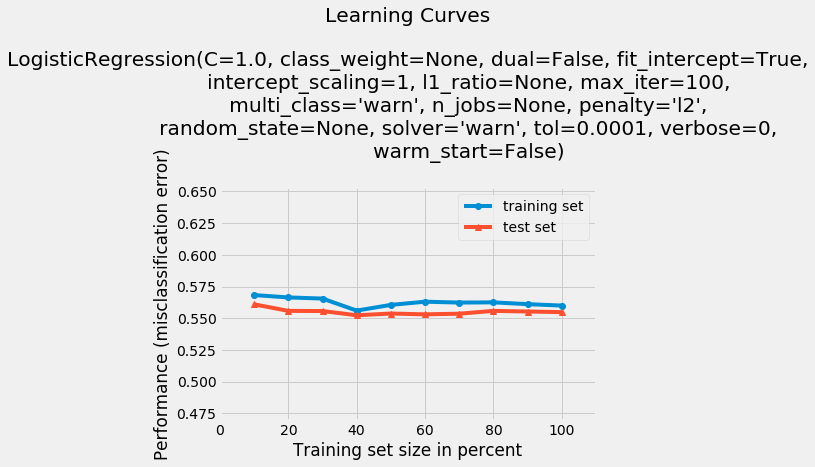

In [45]:
!pip install mlxtend

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train,x_validation, y_validation, logisticreg)

#### DECISION TREE

In [46]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

DT = DecisionTreeClassifier(criterion= 'entropy',max_depth= 10,max_features= 'auto',min_samples_split=10,min_samples_leaf=20)
    

DT.fit(x_train,y_train)

y_predict_train = DT.predict(x_train)
y_predict_val = DT.predict(x_validation)

In [47]:
print(classification_report(y_train,y_predict_train))
print(classification_report(y_validation,y_predict_val))

print("Train Accuracy is ",accuracy_score(y_train,y_predict_train ))
print("Test Accuracy is ",accuracy_score(y_validation,y_predict_val))


              precision    recall  f1-score   support

           1       0.70      0.51      0.59      3873
           2       0.67      0.95      0.78      7587
           3       0.67      0.43      0.52      3879
           4       0.60      0.46      0.52      3565

    accuracy                           0.66     18904
   macro avg       0.66      0.59      0.60     18904
weighted avg       0.66      0.66      0.64     18904

              precision    recall  f1-score   support

           1       0.62      0.46      0.53      1594
           2       0.67      0.94      0.78      3325
           3       0.58      0.37      0.45      1657
           4       0.52      0.39      0.45      1526

    accuracy                           0.63      8102
   macro avg       0.59      0.54      0.55      8102
weighted avg       0.61      0.63      0.60      8102

Train Accuracy is  0.6620292001692764
Test Accuracy is  0.6268822512959763


([0.4005291005291005,
  0.3682539682539683,
  0.3733027684711691,
  0.3393730987964555,
  0.33580194667795177,
  0.3324810439076001,
  0.3345677146311971,
  0.33789592012166897,
  0.3570798800916946,
  0.35817816335167163],
 [0.48086892125401137,
  0.4371760059244631,
  0.4196494692668477,
  0.39903727474697603,
  0.38126388546038015,
  0.3758331276228092,
  0.37928906442853616,
  0.37546284867933843,
  0.3843495433226364,
  0.38928659590224635])

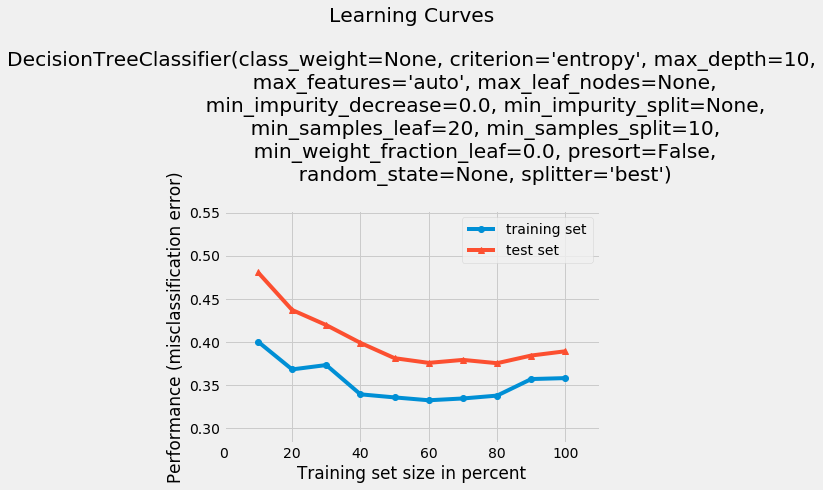

In [48]:
!pip install mlxtend

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train,x_validation, y_validation, DT)

#### RANDOM FOREST 

In [49]:
from sklearn.ensemble import RandomForestClassifier
RM = RandomForestClassifier(criterion='entropy',n_estimators=125,max_depth=10,min_samples_split=0.001,max_features='auto',min_weight_fraction_leaf=0.0001)
RM.fit(x_train,y_train)

y_train_predictions = RM.predict(x_train)
y_val_predictions = RM.predict(x_validation)

In [50]:
print(classification_report(y_train,y_train_predictions))
print(classification_report(y_validation,y_val_predictions))

print("Train Accuracy is ",accuracy_score(y_train,y_train_predictions ))
print("Test Accuracy is ",accuracy_score(y_validation,y_val_predictions))


              precision    recall  f1-score   support

           1       0.79      0.56      0.66      3873
           2       0.70      0.98      0.81      7587
           3       0.75      0.53      0.62      3879
           4       0.72      0.56      0.63      3565

    accuracy                           0.72     18904
   macro avg       0.74      0.66      0.68     18904
weighted avg       0.73      0.72      0.71     18904

              precision    recall  f1-score   support

           1       0.68      0.47      0.55      1594
           2       0.69      0.97      0.81      3325
           3       0.63      0.45      0.52      1657
           4       0.63      0.49      0.55      1526

    accuracy                           0.67      8102
   macro avg       0.66      0.59      0.61      8102
weighted avg       0.67      0.67      0.65      8102

Train Accuracy is  0.7215404147270419
Test Accuracy is  0.6731671192298198


([0.12328042328042328,
  0.16746031746031745,
  0.20208076177041087,
  0.22258960454966276,
  0.24206517139229794,
  0.2549814847469582,
  0.2623941958887545,
  0.2665476426634927,
  0.27267383765355907,
  0.27835378755818874],
 [0.3685509750678845,
  0.34695137003209087,
  0.3333744754381634,
  0.33028881757590717,
  0.33448531226857564,
  0.3270797333991607,
  0.32843742285855343,
  0.32670945445568994,
  0.3260923228832387,
  0.33028881757590717])

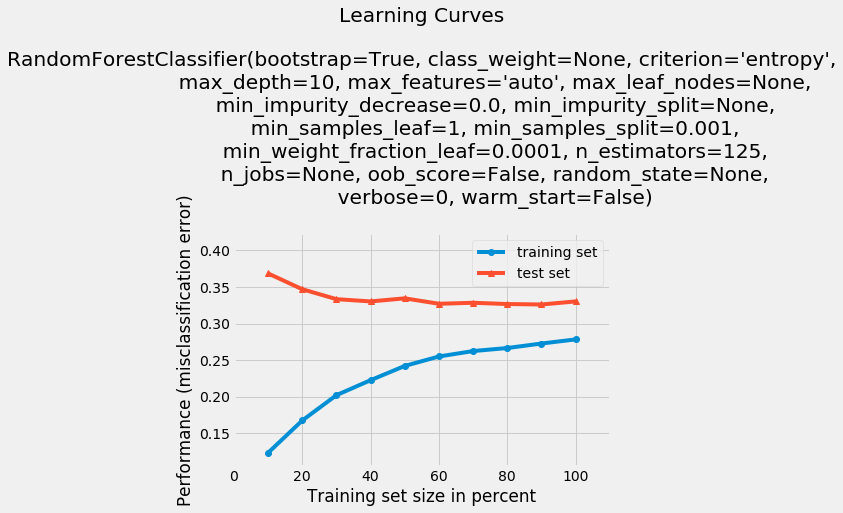

In [51]:
!pip install mlxtend

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train,x_validation, y_validation, RM)

#### MULTI LAYER PERCEPTRON (MLP CLASSIFIER)

In [52]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='relu',batch_size=22,random_state=1234,hidden_layer_sizes=(50,))
model.fit(x_train,y_train)

from sklearn.metrics import accuracy_score,classification_report
sklearn_mlp_train_preds = model.predict(x_train)
sklearn_mlp_validation_preds = model.predict(x_validation)

print(classification_report(y_train,sklearn_mlp_train_preds))
print(classification_report(y_validation,sklearn_mlp_validation_preds))

print("Train Accuracy is ",accuracy_score(y_train,sklearn_mlp_train_preds))
print("Test Accuracy is ",accuracy_score(y_validation,sklearn_mlp_validation_preds))




              precision    recall  f1-score   support

           1       0.67      0.61      0.64      3873
           2       0.84      0.97      0.90      7587
           3       0.65      0.56      0.60      3879
           4       0.74      0.69      0.72      3565

    accuracy                           0.76     18904
   macro avg       0.73      0.71      0.72     18904
weighted avg       0.75      0.76      0.75     18904

              precision    recall  f1-score   support

           1       0.63      0.58      0.61      1594
           2       0.86      0.97      0.91      3325
           3       0.62      0.54      0.58      1657
           4       0.74      0.69      0.71      1526

    accuracy                           0.75      8102
   macro avg       0.71      0.70      0.70      8102
weighted avg       0.74      0.75      0.75      8102

Train Accuracy is  0.7598920863309353
Test Accuracy is  0.7533942236484819


C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

([0.26666666666666666,
  0.25502645502645505,
  0.2442250044083936,
  0.23912180928448618,
  0.24449851883199322,
  0.24651736907071065,
  0.24153567110036275,
  0.23983336639555644,
  0.2411097396108858,
  0.24010791366906475],
 [0.3132559861762528,
  0.2819057022957295,
  0.2632683288077018,
  0.2585781288570723,
  0.25388792890644285,
  0.25191310787459886,
  0.2520365341890891,
  0.2474697605529499,
  0.2508022710441866,
  0.24660577635151815])

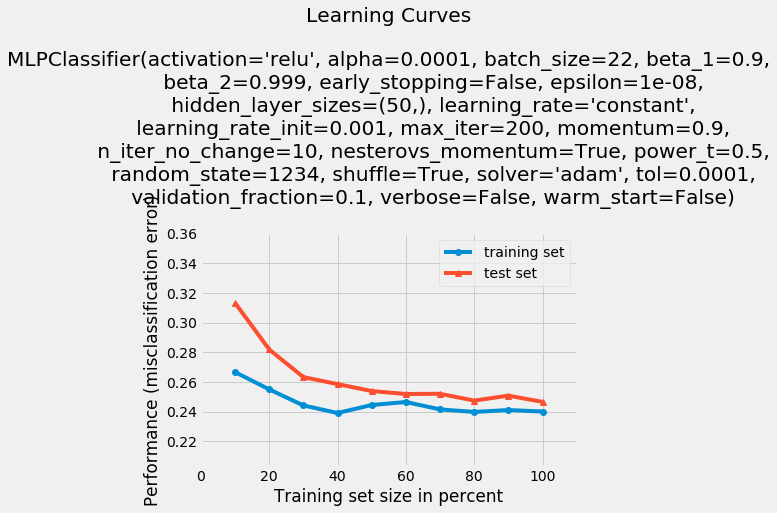

In [54]:
!pip install mlxtend

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train, x_validation, y_validation,model )

#### PREDICTING THE MODEL 

In [372]:
y_predict = model.predict(c_test_data)
y_predict

array([4, 1, 2, ..., 4, 2, 2], dtype=int64)

#### SUBMISSION FILE

In [373]:
testpredict_df= pd.DataFrame()
testpredict_df=ID1
testpredict_df["alpha"]=pd.Series(y_predict)

C:\Users\Vyshnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [374]:
testpredict_df.to_csv('submission3.csv',index=False)

In [375]:
testpredict_df.head()

,Id,alpha
0,270007,4
1,270008,1
2,270009,2
3,270010,1
4,270011,4
